# StatTutor Lab: Risk Factors for Low Birth Weight

Low birth weight is an outcome that has been of concern to physicians for years. This is due to the fact that infant mortality rates and birth defect rates are very high for babies with low birth weight. A woman's behavior during pregnancy (including diet, smoking habits, and obtaining prenatal care) can greatly alter her chances of carrying the baby to term and, consequently, of delivering a baby of normal birth weight. 

In this exercise, we will use a 1986 study (Hosmer and Lemeshow (2000), Applied Logistic Regression: Second Edition) in which data were collected from 189 women (of whom 59 had low birth weight infants) at the Baystate Medical Center in Springfield, MA (an academic, research, and teaching hospital that serves as the western campus of Tufts University School of Medicine and is the only Level 1 trauma center in western Massachusetts). The goal of the study was to identify risk factors associated with giving birth to a low birth weight baby.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

# Check the data

In [3]:
birth = pd.read_excel('low_birth_weight.xls')

In [4]:
birth.dtypes

LOW      int64
AGE      int64
LWT      int64
RACE     int64
SMOKE    int64
PTL      int64
HT       int64
UI       int64
FTV      int64
BWT      int64
dtype: object

In [5]:
birth.describe()

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.312169,23.238095,129.814815,1.846561,0.391534,0.195767,0.063492,0.148148,0.793651,2944.656085
std,0.464609,5.298678,30.579380,0.918342,0.489390,0.493342,0.244494,0.356190,1.059286,729.022417
min,0.000000,14.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.000000
25%,0.000000,19.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2414.000000
50%,0.000000,23.000000,121.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2977.000000
75%,1.000000,26.000000,140.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3475.000000
max,1.000000,45.000000,250.000000,3.000000,1.000000,3.000000,1.000000,1.000000,6.000000,4990.000000


**LOW**: Low birth weight (0=No (birth weight >= 2500 g) 1=Yes (birth weight < 2500 g)  
**AGE**: Age of mother (in years)  
**LWT**: Weight of mother at the last menstrual period (in pounds)  
**RACE**: Race of mother (1=White, 2=Black, 3=Other)  
**SMOKE**: Smoking status during pregnancy (0=No, 1=Yes)  
**PTL**: History of premature labor (0=None, 1=One, etc.)  
**HT**: History of hypertension (0=No, 1=Yes)  
**UI**: Presence of uterine irritability (0=No, 1=Yes)  
**FTV**: Number of physician visits during the first trimester  
**BWT**: The actual birth weight (in grams)  

Out of the first ten mothers in the dataset, how many gave birth to a baby whose weight was normal?

In [6]:
birth[:10].loc[birth.LOW == 0]

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT
0,0,29,140,1,1,0,0,0,2,2977
1,0,32,132,1,0,0,0,0,4,3080
2,0,36,175,1,0,0,0,0,0,3600
4,0,25,130,1,0,0,0,0,2,4153
5,0,26,168,2,1,0,0,0,0,2920
6,0,22,131,1,0,0,0,0,1,3460
8,0,32,170,1,0,0,0,0,0,3473
9,0,32,134,1,1,1,0,0,4,3430


Out of the first ten mothers in the data set, how old was the mother who gave birth to the baby with the lowest birth weight?

In [7]:
birth[:10].loc[birth.BWT == birth.BWT[:10].min()]

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT
7,1,32,105,1,1,0,0,0,0,1818


Out of the first ten mothers who did not visit a physician during the first trimester, how many gave birth to a low birth weight baby?

In [8]:
birth.loc[birth.FTV == 0][:10].loc[birth.LOW == 1]

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT
7,1,32,105,1,1,0,0,0,0,1818
11,1,25,105,3,0,1,1,0,0,1330
12,1,24,138,1,0,0,0,0,0,2100
13,1,23,94,3,1,0,0,0,0,2495
17,1,21,103,3,0,0,0,0,0,1970
18,1,25,85,3,0,0,0,1,0,1474


# Questions

### Do the data provide evidence that the occurrence of low birth weight is significantly related to whether or not the mother smoked during pregnancy?

In [149]:
# make coditional proportion tables
tw_table = (birth.loc[:, ['SMOKE', 'LOW']]
            .join(pd.get_dummies(birth.LOW))
            .drop('LOW', axis=1)
            .pivot_table(index='SMOKE', 
                         aggfunc='sum')
            .rename_axis('LOW', axis=1))
# add total columns
tw_table['Total'] = tw_table.sum(axis=1)
# add total row
tw_table = (tw_table.append(tw_table.sum(axis=0).rename('Total'))
            .rename({2: 'Total'}, axis=0))

#### Chi-square test for independence
Ho: both variables are independent  
Ha: both variables are not indetpendent  

#### Observation counts

In [150]:
tw_table

LOW,0,1,Total
SMOKE,,,
0,86,29,115
1,44,30,74
Total,130,59,189


#### Conditional proportions

In [154]:
tw_table.apply(lambda x: x/x.Total, axis=1)

LOW,0,1,Total
SMOKE,,,
0,0.747826,0.252174,1.0
1,0.594595,0.405405,1.0
Total,0.687831,0.312169,1.0


#### Test

Pass the two-way table without the margins to chi_square function, and it will return: statistic, pvalue, degress of freedom and expected values

In [219]:
s, p, df, expected = st.chi2_contingency(tw_table.loc[:, [0, 1]][:-1])
print(f'statistic: {s}, p-value: {p}, df: {df}')

statistic: 4.235928545602459, p-value: 0.03957696932523243, df: 1


#### Expected values

In [218]:
(pd.DataFrame(expected, 
             index=[0, 1], 
             columns=[0, 1])
 .rename_axis('SMOKE', axis=0)
 .rename_axis('LOW', axis=1))

LOW,0,1
SMOKE,,
0,79.100529,35.899471
1,50.899471,23.100529


#### Conclusion
Based on the chi-square test results, considering the 5% significance test, we have strong evidence against Ho, we can reject the null hypothesis , and conclude that smoking and low birth weight are not independent.

### Do the results of the study provide significant evidence that the race of the mother is a factor in the occurrence of low birth weight?

Ho: low weight birth and the race of the mother are independent  
Ha: low weight birth and the race of the mother are **not** independent

#### Contingency table

In [231]:
observed = (birth.loc[:, ['LOW', 'RACE']]
                .join(pd.get_dummies(birth.LOW))
                .drop('LOW', axis=1)
                .pivot_table(index='RACE', aggfunc='sum')
                .rename_axis('LOW', axis=1))
# add totals
observed['total'] = observed.sum(axis=1)
observed = observed.append(observed.sum(axis=0).rename('total'))
observed

LOW,0,1,total
RACE,,,
1,73,23,96
2,15,11,26
3,42,25,67
total,130,59,189


#### Contitional percentages

In [232]:
observed.apply(lambda x: x/x.total, axis=1)

LOW,0,1,total
RACE,,,
1,0.760417,0.239583,1.0
2,0.576923,0.423077,1.0
3,0.626866,0.373134,1.0
total,0.687831,0.312169,1.0


#### Chi-square test for independence
Following the rule of thumb all observations are above 5, therefore is safe to proceed with chi-square test

In [240]:
s, p, df, expected = st.chi2_contingency(observed.loc[:, [0, 1]][:-1])
print(f'statistic: {s}, p-value: {p}, df: {df}')

statistic: 5.004813010903258, p-value: 0.08188769812479516, df: 2


#### Expected values

In [241]:
(pd.DataFrame(expected, index=[1, 2, 3], columns=[0, 1])
     .rename_axis('RACE', axis=0)
     .rename_axis('LOW', axis=1))

LOW,0,1
RACE,,
1,66.031746,29.968254
2,17.883598,8.116402
3,46.084656,20.915344


#### Conclusion

Considering the 5% significance test, the test result does not give us strong evidence against the null hypothesis Ho, therefore we cannot conclude that 

### Are there significant differences in age between mothers who gave birth to low weight babies and those whose baby's weight was normal?

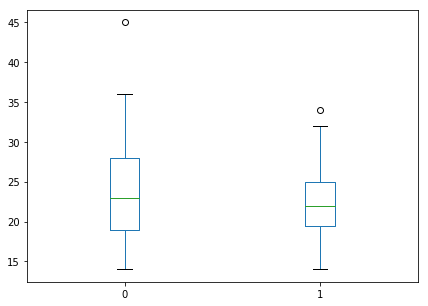

In [268]:
birth_weight = birth.loc[:, ['LOW', 'AGE']].pivot(columns='LOW', values='AGE')
birth_weight.plot.box(figsize=(7, 5))

In [274]:
birth_weight.describe()

LOW,0,1
count,130.000000,59.000000
mean,23.661538,22.305085
std,5.584522,4.511496
min,14.000000,14.000000
25%,19.000000,19.500000
50%,23.000000,22.000000
75%,28.000000,25.000000
max,45.000000,34.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11080ac50>,
      dtype=object)

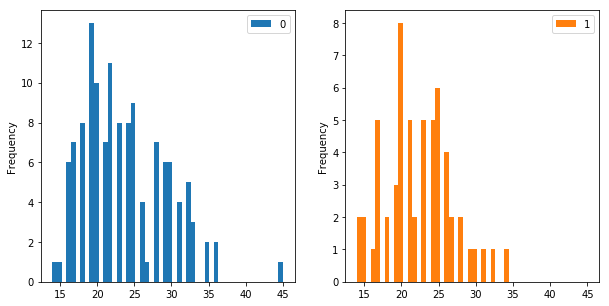

In [276]:
birth_weight.plot.hist(bins=50, subplots=True, layout=(1, 2), figsize=(10, 5))

There's some overlap, and both normal and underweight appears to contain outliar

#### T-test for two independent means

Ho: u1 - u2 = 0  
Ha: u1 - u2 != 0  
Where u1 is the mean for regular weight babies and u2 is the mean for underweight babies.

In [279]:
st.ttest_ind(birth_weight.loc[:, 0],
             birth_weight.loc[:, 1], 
             nan_policy='omit')

Ttest_indResult(statistic=1.638098209333269, pvalue=0.10308272124540874)

#### Conclusion

The test result is not significant, considering a 5% significance test p-value 0.10 is high. Therefore we do not reject Ho, and cannot conclude that the means of the ages of mothers of low birth weight babies differs from the ages of mother of regular babies.